Q. diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압),
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

Outcome
0    500
1    268
Name: count, dtype: int64
정확도: 0.7987, 정밀도: 0.7674
 재현율: 0.6111, F1 Score: 0.6804, ROC_AUC Score: 0.8433


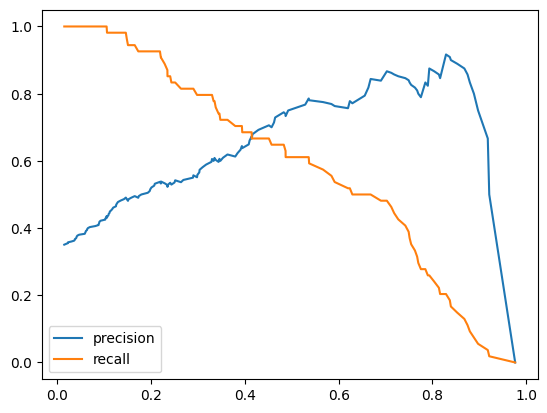

임곗값: 0.3
정확도: 0.7143, 정밀도: 0.5658
 재현율: 0.7963, F1 Score: 0.6615, ROC_AUC Score: 0.8433

임곗값: 0.33
정확도: 0.7403, 정밀도: 0.6000
 재현율: 0.7778, F1 Score: 0.6774, ROC_AUC Score: 0.8433

임곗값: 0.36
정확도: 0.7468, 정밀도: 0.6190
 재현율: 0.7222, F1 Score: 0.6667, ROC_AUC Score: 0.8433

임곗값: 0.39
정확도: 0.7532, 정밀도: 0.6333
 재현율: 0.7037, F1 Score: 0.6667, ROC_AUC Score: 0.8433

임곗값: 0.42
정확도: 0.7792, 정밀도: 0.6923
 재현율: 0.6667, F1 Score: 0.6792, ROC_AUC Score: 0.8433

임곗값: 0.45
정확도: 0.7857, 정밀도: 0.7059
 재현율: 0.6667, F1 Score: 0.6857, ROC_AUC Score: 0.8433

임곗값: 0.48
정확도: 0.7987, 정밀도: 0.7447
 재현율: 0.6481, F1 Score: 0.6931, ROC_AUC Score: 0.8433

임곗값: 0.5
정확도: 0.7987, 정밀도: 0.7674
 재현율: 0.6111, F1 Score: 0.6804, ROC_AUC Score: 0.8433



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import Binarizer

diabetes = pd.read_csv('/content/drive/MyDrive/KDT_2404/dataset/diabetes.csv')
print(diabetes['Outcome'].value_counts())
diabetes.head(3)

# 결측치 처리
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
diabetes[zero_features] = diabetes[zero_features].replace(0, diabetes[zero_features].mean())

# 평가지표 사용자 함수
def get_clf_eval(y_test, pred, proba):
  # 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, proba)

  print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}\n 재현율: {recall:.4f}, F1 Score: {f1:.4f}, ROC_AUC Score: {roc_auc:.4f}')

# X = diabetes.drop('Outcome', axis=1)
# y = diabetes['Outcome']

X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# 테스트용 학습용 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱리그레션에 적용
lr_clf = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
lr_clf.fit(X_train, y_train)
# 예측
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred)
# 예측확률
proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, proba)
print("=========================================")

# 정밀도/재현율 곡선 시각화
precisions, recalls, thresholds = precision_recall_curve(y_test, proba)
plt.plot(thresholds, precisions[:-1], label='precision')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.legend()
plt.show()

# 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
  # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:',custom_threshold)
    get_clf_eval(y_test , custom_predict, pred_proba_c1)
    print()

# 산출된 임계값을 적용한 평가
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
proba_1 = proba.reshape(-1,1)
get_eval_by_threshold(y_test, proba_1, thresholds )